## Instalação das Bibliotecas necessárias

In [34]:
!pip install polars plotnine scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 4.3 MB/s eta 0:00:00


### Importando Biliotecas

In [24]:
import polars as pl
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, geom_bar, geom_boxplot, facet_wrap, geom_density, theme

### Carregando e Limpando Dados

In [19]:
df = pl.read_csv("/content/diamonds.csv.gz")

In [20]:
df.head()

carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,i64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335,4.34,4.35,2.75


In [21]:
df.describe()

statistic,carat,cut,color,clarity,depth,table,price,x,y,z
str,f64,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",53940.0,"""53940""","""53940""","""53940""",53940.0,53940.0,53940.0,53940.0,53940.0,53940.0
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.79794,null,null,null,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
"""std""",0.474011,null,null,null,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
"""min""",0.2,"""Fair""","""D""","""I1""",43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,null,null,null,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,null,null,null,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,null,null,null,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,"""Very Good""","""J""","""VVS2""",79.0,95.0,18823.0,10.74,58.9,31.8


In [22]:
df = df.unique().drop_nulls()

### 2 - Relação entre Peso e Quilate (Amostrado em 1000)

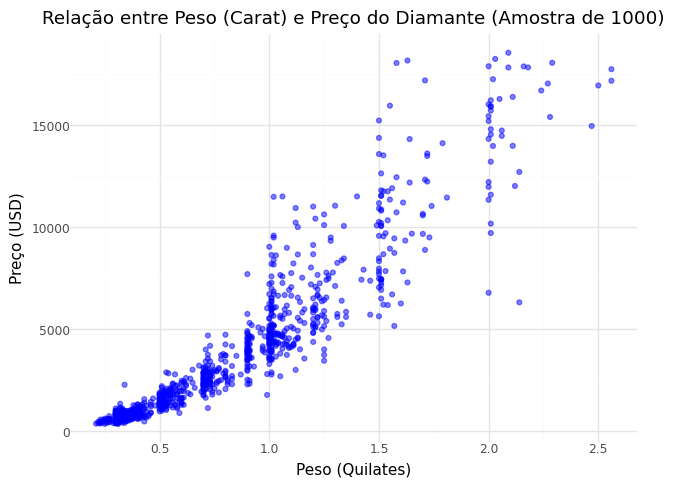

In [29]:
df_sample = df.sample(1000, seed=42)  # Amostra aleatória de 1000 pontos

scatter_plot = (
    ggplot(df_sample, aes(x='carat', y='price')) +
    geom_point(alpha=0.5, color='blue') +
    labs(
        title='Relação entre Peso (Carat) e Preço do Diamante (Amostra de 1000)',
        x='Peso (Quilates)',
        y='Preço (USD)'
    ) +
    theme_minimal()
)
scatter_plot.draw()

  Para melhorar a visualização dos dados, utilizamnos uma amostra de pontos, mantendo a representatividade dos dados, porém melhorando a visibulidade.

  Podemos observar que quanto maior o quilate, maior o preço do diamante. As duas variaveis parecem ter uma corelação positiva alta




3 - A relação identificada na questão anterior é a mesma relação presente nos diferentes cortes de diamantes?

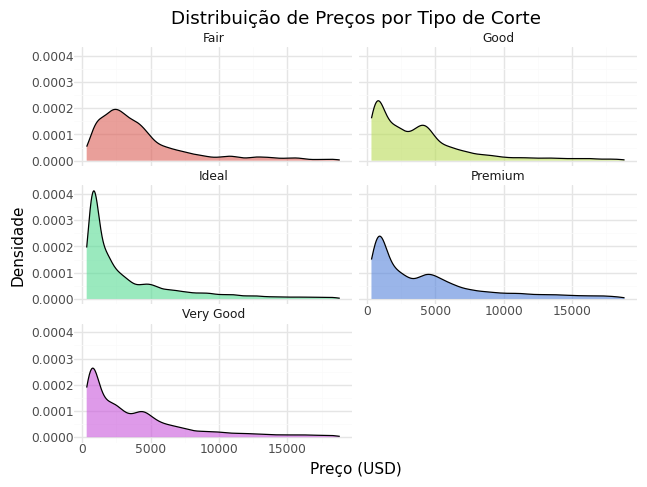

In [31]:
density_plot = (
    ggplot(df, aes(x='price', fill='cut')) +
    geom_density(alpha=0.6) +
    facet_wrap('~cut', ncol=2) +
    labs(
        title='Distribuição de Preços por Tipo de Corte',
        x='Preço (USD)',
        y='Densidade'
    ) +
    theme_minimal() +
    theme(legend_position='none')
)
density_plot.draw()

As densidades dos 5 tipos de corte seguem a mesma tendencia, principalmente "Good", "Premium" e "Very Good". Porém vemos uma menor variação em "Fair" e "Ideal".

### 3 -Relação entre preço e peso do diamante (Amostra 2000)

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 61 rows containing missing values.


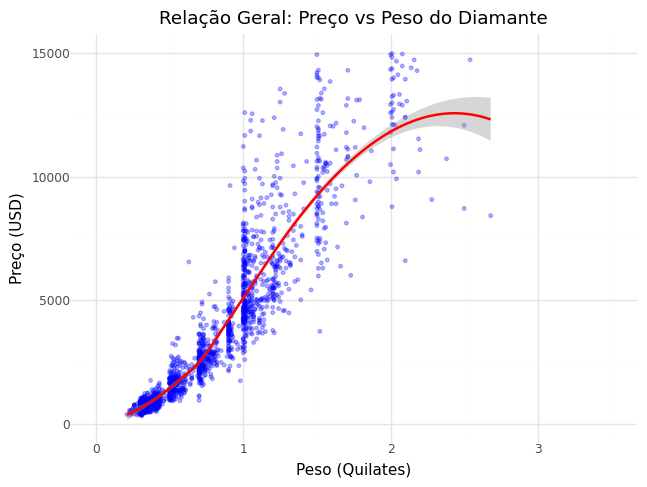

In [37]:
general_plot = (
    ggplot(df.sample(2000), aes(x='carat', y='price')) +
    geom_point(alpha=0.3, color='blue', size=1) +
    geom_smooth(method='loess', color='red', se=True) +
    labs(
        title='Relação Geral: Preço vs Peso do Diamante',
        x='Peso (Quilates)',
        y='Preço (USD)'
    ) +
    theme_minimal() +
    scale_x_continuous(limits=(0, 3.5)) +
    scale_y_continuous(limits=(0, 15000))
)
general_plot.draw()

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 155 rows containing missing values.


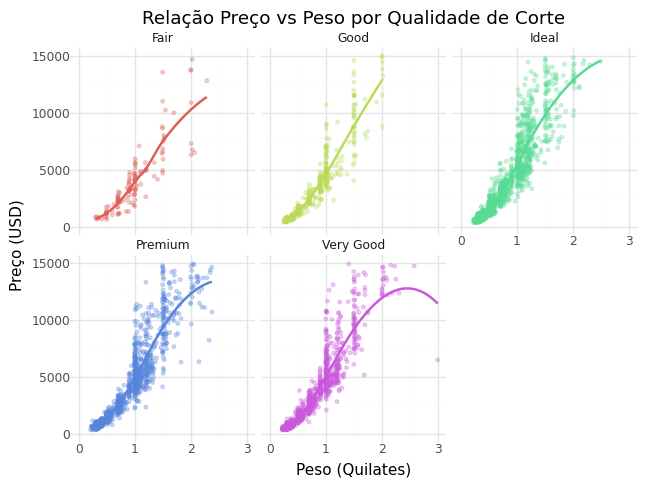

In [38]:
cut_plot = (
    ggplot(df.sample(5000), aes(x='carat', y='price', color='cut')) +
    geom_point(alpha=0.3, size=1) +
    geom_smooth(method='loess', se=False) +
    facet_wrap('~ cut') +
    labs(
        title='Relação Preço vs Peso por Qualidade de Corte',
        x='Peso (Quilates)',
        y='Preço (USD)'
    ) +
    theme_minimal() +
    theme(legend_position='none') +
    scale_x_continuous(limits=(0, 3)) +
    scale_y_continuous(limits=(0, 15000))
)
cut_plot.draw()

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 161 rows containing missing values.
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_smooth : Removed 1 rows containing missing values.


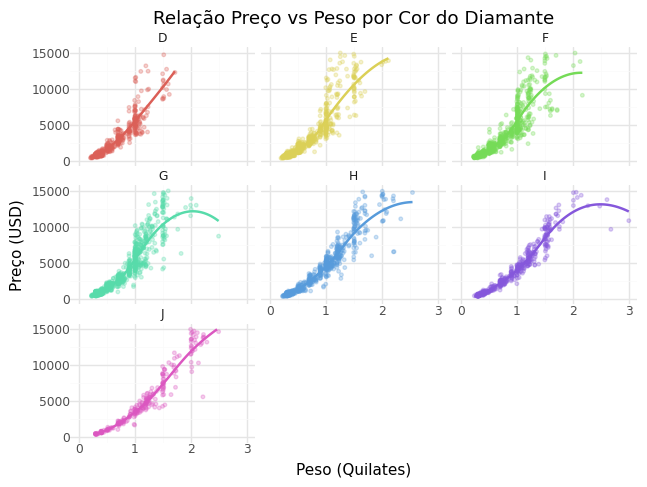

In [39]:
color_plot = (
    ggplot(df.sample(5000), aes(x='carat', y='price', color='color')) +
    geom_point(alpha=0.3, size=1) +
    geom_smooth(method='loess', se=False) +
    facet_wrap('~ color') +
    labs(
        title='Relação Preço vs Peso por Cor do Diamante',
        x='Peso (Quilates)',
        y='Preço (USD)',
        color='Cor'
    ) +
    theme_minimal() +
    theme(legend_position='none') +
    scale_x_continuous(limits=(0, 3)) +
    scale_y_continuous(limits=(0, 15000))
)
color_plot.draw()

/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 167 rows containing missing values.
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_smooth : Removed 7 rows containing missing values.


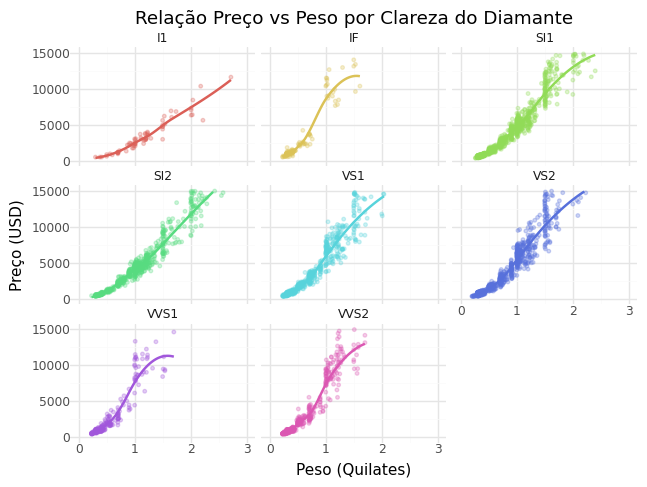

In [40]:
clarity_plot = (
    ggplot(df.sample(5000), aes(x='carat', y='price', color='clarity')) +
    geom_point(alpha=0.3, size=1) +
    geom_smooth(method='loess', se=False) +
    facet_wrap('~ clarity') +
    labs(
        title='Relação Preço vs Peso por Clareza do Diamante',
        x='Peso (Quilates)',
        y='Preço (USD)',
        color='Clareza'
    ) +
    theme_minimal() +
    theme(legend_position='none') +
    scale_x_continuous(limits=(0, 3)) +
    scale_y_continuous(limits=(0, 15000))
)
clarity_plot.draw()

In [41]:
# Calcular preço médio por quilate para cada categoria
def analyze_category(df, category):
    stats = df.group_by(category).agg([
        pl.corr('price', 'carat').alias('correlacao'),
        (pl.col('price').mean() / pl.col('carat').mean()).alias('preco_por_quilate'),
        pl.col('price').mean().alias('preco_medio'),
        pl.len().alias('n')
    ]).sort('preco_por_quilate', descending=True)
    return stats

print("\nPor CORTE:")
print(analyze_category(df, 'cut'))
print("\nPor COR:")
print(analyze_category(df, 'color'))
print("\nPor CLAREZA:")
print(analyze_category(df, 'clarity'))


Por CORTE:
shape: (5, 5)
┌───────────┬────────────┬───────────────────┬─────────────┬───────┐
│ cut       ┆ correlacao ┆ preco_por_quilate ┆ preco_medio ┆ n     │
│ ---       ┆ ---        ┆ ---               ┆ ---         ┆ ---   │
│ str       ┆ f64        ┆ f64               ┆ f64         ┆ u32   │
╞═══════════╪════════════╪═══════════════════╪═════════════╪═══════╡
│ Premium   ┆ 0.924944   ┆ 5140.645734       ┆ 4583.501891 ┆ 13748 │
│ Very Good ┆ 0.926309   ┆ 4938.030025       ┆ 3981.016157 ┆ 12069 │
│ Ideal     ┆ 0.931163   ┆ 4922.372752       ┆ 3462.749953 ┆ 21488 │
│ Good      ┆ 0.922451   ┆ 4625.885615       ┆ 3919.121039 ┆ 4891  │
│ Fair      ┆ 0.856732   ┆ 4160.012351       ┆ 4341.954318 ┆ 1598  │
└───────────┴────────────┴───────────────────┴─────────────┴───────┘

Por COR:
shape: (7, 5)
┌───────┬────────────┬───────────────────┬─────────────┬───────┐
│ color ┆ correlacao ┆ preco_por_quilate ┆ preco_medio ┆ n     │
│ ---   ┆ ---        ┆ ---               ┆ ---         ┆ --- 

AS maiores dificuldades foram o alto volume de dados(muitos pontos para plotar, visualização muito convoluta) e a alta dimencionalidade dos dados, muitos cortes X cores X quilates X preço.

Em geral podemos afirmar que a relação entre preço e peso não é uniforme. Ela varia dependendo da qualidade do diamante. Diamantes de maior qualidade (melhor corte, cor mais rara, maior clareza) mostram uma curva de preço muito mais íngreme, onde o preço aumenta aceleradamente com o peso.

In [47]:
!jupyter nbconvert --to html /content/desafio_14.ipynb.ipynb

[NbConvertApp] WARNING | pattern 'Desafio_14.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    